# 檢視 Outliers

### 為何會有 outliers, 常見的 outlier 原因

未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999

可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_path = '../data/'

In [7]:
f_app = os.path.join(dir_path, "application_train.csv")
print('Path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)

app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


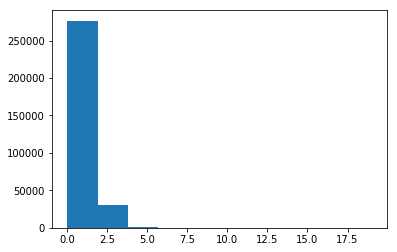

In [12]:
## 檢視是否有異常值
app_train['CNT_CHILDREN'].describe()

plt.hist(app_train['CNT_CHILDREN'])
plt.show()

In [15]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [17]:
anom = app_train['CNT_CHILDREN'][app_train['CNT_CHILDREN'] == 19]
non_anom = app_train['CNT_CHILDREN'][app_train['CNT_CHILDREN'] != 19]

print('The non-anomalies default on %0.2f%% of loans' %  (100*non_anom.mean()))
print('The anomalies default on %0.2f%% of loans' % (100*anom.mean()))
print('There are %d anomalous CNT_CHILDREN' % len(anom))

The non-anomalies default on 41.69% of loans
The anomalies default on 1900.00% of loans
There are 2 anomalous CNT_CHILDREN


In [33]:
# 新增一個欄位: CNT_CHILDREN_ANOM 來標記 CNT_CHILDREN 是否異常
app_train['CNT_CHILDREN_ANOM'] = app_train['CNT_CHILDREN'] == 19
print(app_train['CNT_CHILDREN_ANOM'].value_counts())

False    307509
True          2
Name: CNT_CHILDREN_ANOM, dtype: int64


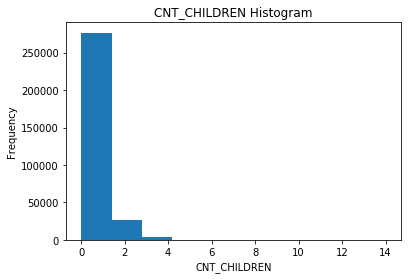

In [34]:
# 這邊我們用 nan 將異常值取代
app_train['CNT_CHILDREN'].replace({19: np.nan}, inplace = True)

app_train['CNT_CHILDREN'].plot.hist(title = 'CNT_CHILDREN Histogram');
plt.xlabel('CNT_CHILDREN');

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [128]:
app_train.dtypes.isin([np.dtype('int64'), np.dtype('float64')]) 

SK_ID_CURR                     True
TARGET                         True
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                   True
AMT_INCOME_TOTAL               True
AMT_CREDIT                     True
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE               False
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE     True
DAYS_BIRTH                     True
DAYS_EMPLOYED                  True
DAYS_REGISTRATION              True
DAYS_ID_PUBLISH                True
OWN_CAR_AGE                    True
FLAG_MOBIL                     True
FLAG_EMP_PHONE                 True
FLAG_WORK_PHONE                True
FLAG_CONT_MOBILE               True
FLAG_PHONE                     True
FLAG_EMAIL                  

In [143]:
app_train.select_dtypes(include=['float64', 'int64'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
dtype_select = app_train.select_dtypes(include=['float64', 'int64'])
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

In [137]:
numeric_columns

[]

In [139]:
# 先篩選數值型的欄位

app_train.select_dtypes(include=['float64', 'int64'])
dtype_select = []
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    fig1, ax1 = plt.subplots()
    ax1.boxplot(col)
    plt.show()

TypeError: not all arguments converted during string formatting

<class 'pandas.core.series.Series'>


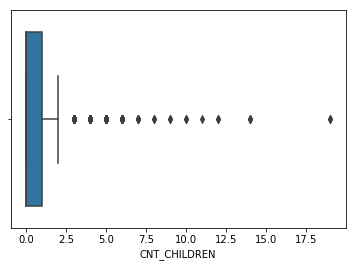

In [83]:
# 先篩選數值型的欄位
import seaborn as sns

print(type(app_train['CNT_CHILDREN']))
sns.boxplot(x = app_train['CNT_CHILDREN'])
plt.show()

<class 'pandas.core.series.Series'>


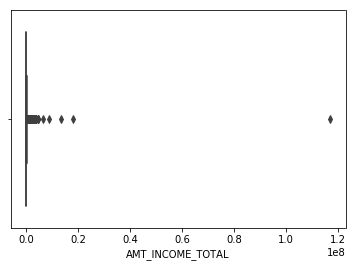

In [84]:
print(type(app_train['AMT_INCOME_TOTAL']))
sns.boxplot(x = app_train['AMT_INCOME_TOTAL'])
plt.show()

<class 'pandas.core.series.Series'>


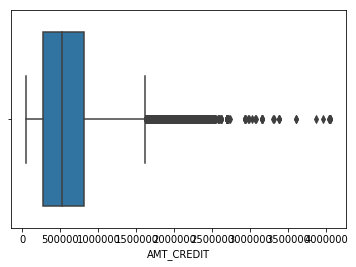

In [85]:
print(type(app_train['AMT_CREDIT']))
sns.boxplot(x = app_train['AMT_CREDIT'])
plt.show()

In [45]:
dtype_select = []

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
plt.show()

TypeError: not all arguments converted during string formatting

In [57]:
numeric_columns = app_train.columns


In [58]:
numeric_columns

Index([u'SK_ID_CURR', u'TARGET', u'NAME_CONTRACT_TYPE', u'CODE_GENDER',
       u'FLAG_OWN_CAR', u'FLAG_OWN_REALTY', u'CNT_CHILDREN',
       u'AMT_INCOME_TOTAL', u'AMT_CREDIT', u'AMT_ANNUITY',
       ...
       u'FLAG_DOCUMENT_18', u'FLAG_DOCUMENT_19', u'FLAG_DOCUMENT_20',
       u'FLAG_DOCUMENT_21', u'AMT_REQ_CREDIT_BUREAU_HOUR',
       u'AMT_REQ_CREDIT_BUREAU_DAY', u'AMT_REQ_CREDIT_BUREAU_WEEK',
       u'AMT_REQ_CREDIT_BUREAU_MON', u'AMT_REQ_CREDIT_BUREAU_QRT',
       u'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [53]:
numeric_columns
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" % len(numeric_columns))

TypeError: not all arguments converted during string formatting

### Hints: Emprical Cumulative Density Plot, ECDF, ECDF with Python

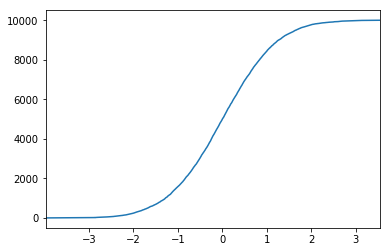

In [20]:
import pandas as pd
import numpy as np # used only to create example data

series = pd.Series(np.random.normal(size=10000))

cdf = series.value_counts().sort_index().cumsum()
cdf.plot()

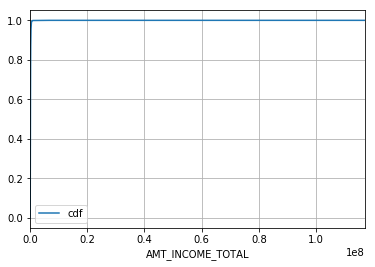

In [29]:
s = pd.Series(app_train['AMT_INCOME_TOTAL'])
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method = 'average', pct = True)
df.sort_values('AMT_INCOME_TOTAL').plot(x = 'AMT_INCOME_TOTAL', y = 'cdf', grid = True)

In [23]:
# Define your series
s = pd.Series(app_train['AMT_INCOME_TOTAL'])
df = pd.DataFrame(s)

# Get to the CDF directly
df['cdf'] = df.rank(method = 'average', pct = True)

# Sort and plot
df.sort_values('value').plot(x = 'value', y = 'cdf', grid = True)

KeyError: 'value'

In [88]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
from mlxtend.plotting import ecdf
x1 = app_train['AMT_INCOME_TOTAL']
cdf = ecdf(x1, x_label='cm')
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


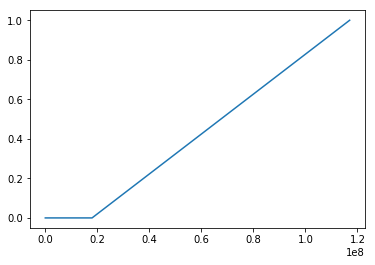

In [104]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
x = np.sort(app_train['AMT_INCOME_TOTAL'])
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker = '')
plt.show()

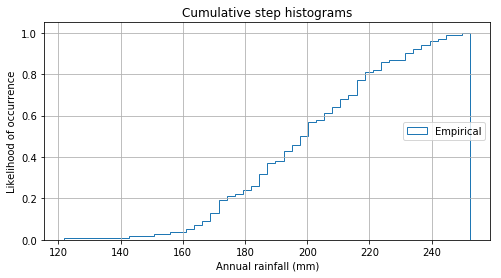

In [122]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density = True, histtype = 'step',
                           cumulative = True, label = 'Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]




# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [144]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

In [18]:
cdf = np.sort(app_train['AMT_INCOME_TOTAL'])
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [117]:
import numpy as np
import scikits.statsmodels as sm
import matplotlib.pyplot as plt

sample = np.random.uniform(0, 1, 50)
ecdf = sm.tools.ecdf(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)

ImportError: No module named scikits.statsmodels

### 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [126]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 0
loc_b = 15

app_train['CNT_CHILDREN'].loc[loc_a, loc_b].hist()
plt.show()

IndexingError: Too many indexers